# Decision Tree

## Intro

<img src="img/02.png">

<img src="img/03.png">

<img src="img/04.png">

## 정말 간단히 보는 iris로 기능적인 부분 확인하자

<img src="img/01.png">

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

In [5]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

## 시각화 관련 부분 기능 확인

In [6]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

* 참고) 시각화를 위해서는 아래의 graphviz 가 필요함. <br>
- step1) graphviz에 대해서 설치 파일을 다운받아서 설치한다. 
<href="https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/"> <br>
- Step2) 아래 그림과 같이 Anaconda Termoinal에서 아래와 같이 설치한다. <br>
>> pip install graphviz <br>
<img src="img/06.png"> <br>
- Step3) 아래 그림과 같이 설치된 곳에 대한 사용자환경변수 & 시스템 환경 변수에 등록<br>
<img src="img/05.png">

In [7]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

<img src="img/07.png">

## 기본적인 DT에서의 파라미터 들에 대한 시각화에 대한 것을 통한 이해

<img src="img/08.png">

* patal length <= 2.45 는 자식 노드를 만들기 위한 규칙 & 만약에 이 조건이 없다면 리프 노드가 됨.!!!<br>
* leaf node : 더 이상의 자식 노드가 없는 것을 이야기를 함.<br>
* gini : 분포 내에서의 gini 계수임<br>
* samples : 지금 규칙에 의해서 해당하는 데이터의 수 <br>
* values : 원본 target의 label 종류에 따른 수들<br>
* 참고) 색이 짙어질 수록 지니 계수가 낮고 해당 레이블에 속하는 샘플의 데이터가 많다는 의미!!!

> **Note : max_depth**<br>
>- "leaf node"
그래서 최종 leaf node를 끌고 내려가면 1개까지 다 분류를 해낼 수 있는 "OverFitting"의 위험성이 존재를 함!!!! 아래의 그림은 그 결과 max_depth를 다르게 하였을 때를 나타나게 된다.<br>
>- max_depth 의 경우에는 얼마나 깊게 내려갈지에 대한 부분이니 어느 정도 overfitting/ underfittng을 좌우하게 된다!!<br>
>- 아래 그림과 같이 max_depth에 따른 예시<br>
>- <img src="img/09.png">

> **Note : min_samples_split**<br>
>- 의미 : 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 수의 개수. 
>- 아래의 그림을 보면 맨 아래의 샘플이 3개이므로 서로 다른 클래스가 있엇도 더 이상 분할하지 않고 리프노드가 되었음. 즉, 자식 노드로 분할하기 위해서 최소한 4개 이상이 있어야 하는데 지금은 3개만 존재하므로..<br>
>- <img src="img/10.png"><br>

> **Note : min_samples_leaf**<br>
>- 의미 : 최종 단인 leaf node가 될 수 있는 샘플 데이터의 수를 지정하는 것. 즉, 말단 노드가 될 경우의 최소한의 샘플 수를 지정한다.<br>
>- 기본값이 1으로 되어 있는데, 이 경우에는 다른 클래스가 하나도 섞이지 않고, 단독으로 아주 그 분류만 잘 되도록 하게 되는 것이다.< br>
>- 값을 크게 증가 : 리프 노드가 될 수 있는 조건이 완화가 되면서 overfitting 을 피할 수 있게 되나, 너무 크게 하면 underfitting 의 위험성이 있으므로 적당히 조절이 중요함<br>
>- 아래 그림과 같이 4로 설정하게 되면, 샘플이 4개 이하로 되면 지니 계수가 크더라도 이 조건을 우선하여 아래로 더 노드를 만들지 않고 Stop
>- <img src="img/11.png"><br>

> **중요**<br>
>- feature 에 대해서 정보를 제공한다.<br>
>- 중요한 feature 들이 중요한 분기점들로 이루어지기 때문에 중요한 특징들을 파악하는데 상당히 도움이 되고, 각기 변수들이 어느 정도 중요한지에 대한 것들을 제공한다. <br>
>- DT 기반의 모든 알고리즘은 이러한 기능을 제공함! <br>
>- 아래의 코드는 각 특징별로 중요도를 파악하는데 활용이 됨.

In [9]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

Feature importances:
[0.02500521 0.         0.55490281 0.42009198]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


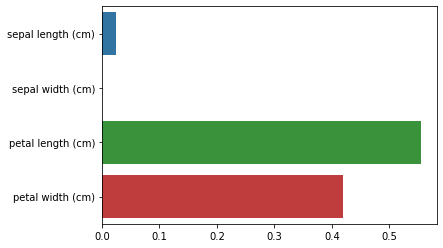

In [10]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(dt_clf.feature_importances_))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names ,dt_clf.feature_importances_ ):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

## Overfitting

### 기본적인 데이터 준비

* 아래는 임의의 데이터를 생성하여 이에 대한 변화를 보고자 하는 것임. 단순하게 특징과 분류를 만들어 주는 make_classfication 을 활용함.

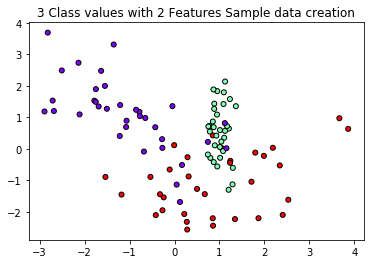

In [11]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

* 각기 설명을 위해서 그래프에 관련된 함수

In [12]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

### 기본적인 DT 모델

C:\Users\acorn-508\anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'


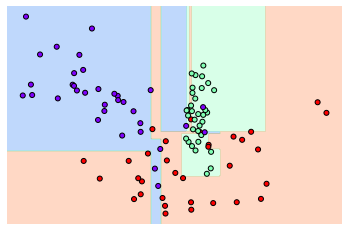

In [13]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

>- 위의 그림은 이상치 까지 하나씩 잘 분류를 하기 위해서 수행이 이루어진 overfitting 으로 학습이 된 것을 볼 수 있다.

### min_samples_leaf =6 으로 설정

C:\Users\acorn-508\anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'


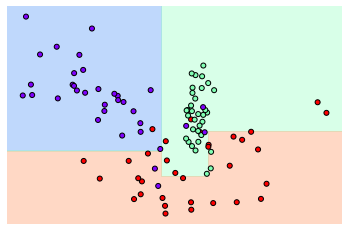

In [14]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

# Example : Human Activity Recognition

## Data <br>
- UCI 에저 제공하는 데이터 셋<br>
- 30명에게 스마트 폰 센서 장착 후 사람의 동작과 관련된 여러 가지 피처들을 수집한 데이터<br>
- 목적 : 어떤 행동을 할 것인지 예측하고자 함.<br>
- 참고) feature 수가 상당히 많은 데이터 셋!!!!<br>
"https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones"

## Feature 이름들에 대한 정보 확인을 먼저 하자!!

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv("UCI HAR Dataset/features.txt", sep="\s+", header=None, names=["column_index","column_name"])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


- 움직임에 관련된 속성 평균, 표준편차 등의 데이터로 되어 있음. <br>
- 중복된 컬럼 이들이 있다고 feature_info.txt에 있음!!!!<br>
* 이제 중복된 부분에 대한 이름 처리부터 시작을 해보자!!!

In [16]:
# Methd1 ) 일반적인 방식
# 각기 컬럼이름에 대해서 확인 
# ---> 중복된 컬럼 이름들이 존재를 하고 있음!!!!!!!

counts,values = pd.Series(feature_name).value_counts().values, pd.Series(feature_name).value_counts().index
df_results = pd.DataFrame(list(zip(values, counts)), columns=["value","count"])
df_results

,value,count
0,"fBodyGyro-bandsEnergy()-9,16",3
1,"fBodyAccJerk-bandsEnergy()-9,16",3
2,"fBodyAccJerk-bandsEnergy()-17,32",3
3,"fBodyAccJerk-bandsEnergy()-57,64",3
4,"fBodyGyro-bandsEnergy()-41,48",3
...,...,...
472,tGravityAcc-entropy()-Y,1
473,fBodyAccJerk-entropy()-Z,1
474,fBodyAcc-std()-X,1
475,tBodyGyroMag-entropy(),1


In [19]:
# Method2 ) 교재의 방식 사용
feature_dup_df = feature_name_df.groupby("column_name").count()
print(feature_dup_df[feature_dup_df["column_index"]>1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


## X_train, X_test 모두 데이터가 바로 숫치형의 데이터로 바로 들어가 있음;;;;즉, 컬럼 이름에 대한 header 가 없이 바로 데이터가 있어서....위의 정보를 가지고 컬럼을 만들어야 함;;;

### 일단 한 번 불러보자;;;

In [20]:
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt',sep='\s+')
X_train.head()

,2.8858451e-001,-2.0294171e-002,-1.3290514e-001,-9.9527860e-001,-9.8311061e-001,-9.1352645e-001,-9.9511208e-001,-9.8318457e-001,-9.2352702e-001,-9.3472378e-001,...,-7.4323027e-002,-2.9867637e-001,-7.1030407e-001,-1.1275434e-001,3.0400372e-002,-4.6476139e-001,-1.8445884e-002,-8.4124676e-001,1.7994061e-001,-5.8626924e-002
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126


### 처리하기 위한 함수들 만들기

In [22]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [23]:
feature_name_df = pd.read_csv("UCI HAR Dataset/features.txt", sep="\s+", header=None, names=["column_index","column_name"])
    
# 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
# DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
# 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt',sep='\s+', names=feature_name )
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt',sep='\s+', names=feature_name)
    
# 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])


In [24]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())
# print(X_train.head())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [25]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


### 정답지 확인
- 정답지들의 종류와 대략적인 분포를 확인하자!!

In [26]:
print(y_train["action"].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [29]:
print(y_train["action"].value_counts(normalize=True))

6    0.191376
5    0.186888
4    0.174918
1    0.166757
2    0.145947
3    0.134113
Name: action, dtype: float64


>- 위의 정답지의 분포를 보면, 아주 한 쪽으로 쏠려는 있지는 않는다. 거의 대략 1000개 정도 내외로 구성되어 있다..

### X_train 에 대해서 값들에 대한 간략 정보들을 확인해보자!!

In [30]:
X_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


>- 대략적으로 거의 모든 값들이 -1~1 정도의 값에서 표준화가 된 데이터들임.<br>
>- 참고로 DT는 SVM의 kernel을 적용하기 전에 표준화 해야 좋으 것과 달리 그냥 해도 큰 문제가 없는 알고리즘임!!! 피처의 값의 대역대가 영향을 미치지가 않음!!!!! 기준으로 갈라치는 알고리즘 방식인..

## DT 모델을 돌려보자...

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 교재와 다른 부분임..
from sklearn.model_selection import StratifiedKFold, KFold

In [33]:
# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


## K-Fold 를 지정하고 파라미터 튜닝을 해보자!!

### 기본 설정

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 교재에서 사용한 방식과는 다름.!!!
skf = KFold(n_splits=5, shuffle = True, random_state = 999)

### max_depth 에 대해서 일단 알아보자..

In [36]:
# 교재에서와 달리, 주요 3가지 파라미터들에 대해서 수행을 함..
params = {
    "max_depth":[6,8,10,12,16,20,24]
}


grid_cv = RandomizedSearchCV(dt_clf, 
                             param_distributions=params, 
                       scoring="accuracy", 
                       cv=skf,
                       verbose=2,
                       n_jobs=-1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

C:\Users\acorn-508\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   10.7s finished


GridSearchCV 최고 평균 정확도 수치:0.9474
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [37]:
params = {
            "max_depth":[14,15,16,17,18]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring="accuracy", 
                       cv=skf, verbose=1,
                      n_jobs=-1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   10.0s finished


GridSearchCV 최고 평균 정확도 수치:0.9474
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [38]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,14,0.945457
1,15,0.944232
2,16,0.947361
3,17,0.944369
4,18,0.942464


In [39]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


>- 주요 대부분의 문제에서는 y_test에 대해서는 알지 못하는 경우가 많고, 실제로 kaggle 같은 경우에는 이것을 맞추는 것이 목표이기 때문에 주어진 X_train, y_train에서 최선을 다하는 것임!!!!

### max_depth, min_samples_split, min_samples_leaf 에 대해서 좀 더 디테일하게 찾아보자!!

In [42]:
# 교재에서와 달리, 주요 3가지 파라미터들에 대해서 수행을 함..
params = {
    "max_depth":[6,8,10,12,16,20,24],
    "min_samples_split":np.arange(2,30,1),
    "min_samples_leaf":np.arange(2,30,1)
}

grid_cv = RandomizedSearchCV(dt_clf, 
                             param_distributions=params, 
                       scoring="accuracy", 
                       cv=skf, 
                       verbose=2,
                       n_jobs=-1,
                            random_state=1234)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.2s finished


GridSearchCV 최고 평균 정확도 수치:0.9402
GridSearchCV 최적 하이퍼 파라미터: {'min_samples_split': 2, 'min_samples_leaf': 7, 'max_depth': 16}


In [43]:
params = {
    "max_depth":[14,15,16,17,18],
    "min_samples_split":[2,3,4],
    "min_samples_leaf":[5,6,7,8,9]
}

grid_cv = GridSearchCV(dt_clf, 
                       param_grid=params, 
                       scoring="accuracy", 
                       cv=skf, verbose=1,
                      n_jobs=-1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  1.8min finished


GridSearchCV 최고 평균 정확도 수치:0.9446
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [44]:
dt_grid_cv_best = grid_cv.best_estimator_
pred = dt_grid_cv_best.predict(X_test)
accuracy_score(y_test,pred)

0.8754665761791652

<img src="img/12.png">

>- 위의 내용을 보면 우선은 X_train에서 하게 되면 2가지 경우 모두 상당히 높은 값을 나타내고 있다.<br>
>- 그러나 X_test에 적용을 해보면 상당히 차이가 발생을 하게 된다.<br>
>- 그리고 단순히 1개의 파라미터만 조정을 하는 것 보다는 여러가지 파라미터들의 조합으로 해보는 것이 조금이라도 더 좋음!!!<br>
9,8558 vs 0.8639
>- 이게 끝이 아니라, 다른 모델들과 결합 or feature 다시...

## 중요 변수들 보자!!

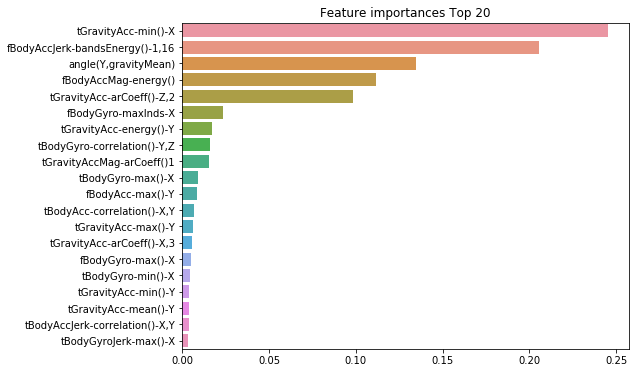

In [45]:
import seaborn as sns

# 교재와 달리 수정을 했으므로, 아래의 모델 이름도 다르다!!!!
ftr_importances_values = dt_grid_cv_best.feature_importances_


# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [114]:
col_20_names=ftr_importances.sort_values(ascending=False)[:20].index
X_train_new=X_train.loc[:,col_20_names]
X_test_new=X_test.loc[:,col_20_names]

In [115]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tGravityAcc-min()-X              7352 non-null   float64
 1   fBodyAccJerk-bandsEnergy()-1,16  7352 non-null   float64
 2   angle(Y,gravityMean)             7352 non-null   float64
 3   fBodyAccMag-energy()             7352 non-null   float64
 4   tGravityAcc-arCoeff()-Z,2        7352 non-null   float64
 5   fBodyGyro-maxInds-X              7352 non-null   float64
 6   tGravityAcc-energy()-Y           7352 non-null   float64
 7   tBodyGyro-correlation()-Y,Z      7352 non-null   float64
 8   tGravityAccMag-arCoeff()1        7352 non-null   float64
 9   tBodyGyro-max()-X                7352 non-null   float64
 10  fBodyAcc-max()-Y                 7352 non-null   float64
 11  tBodyAcc-correlation()-X,Y       7352 non-null   float64
 12  tGravityAcc-max()-Y 

In [126]:
Final_X_train=X_train.loc[:,ftr_importances.sort_values(ascending=False)[:97].index]
Final_X_test=X_test.loc[:,ftr_importances.sort_values(ascending=False)[:97].index]

## 중요 변수들을 활용해서 직접 앞에보다 좋은 성능이 나타나는 것을 찾아보자!!

스스로 찾아볼 것!!!

>- 아까 전에 full data set으로 한 것 보다 조금이라도 성능이 향상된 것으 알 수 있음!!!
<img src="img/14.png">


In [127]:
params = {
    "max_depth":[6,8,10,12,16,20,24],
    "min_samples_split":np.arange(2,30,1),
    "min_samples_leaf":np.arange(2,30,1)
}

grid_cv = RandomizedSearchCV(dt_clf, 
                             param_distributions=params, 
                       scoring="accuracy", 
                       cv=skf, 
                       verbose=2,
                       n_jobs=-1,
                            random_state=1234)
grid_cv.fit(Final_X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.9s finished


GridSearchCV 최고 평균 정확도 수치:0.9518
GridSearchCV 최적 하이퍼 파라미터: {'min_samples_split': 2, 'min_samples_leaf': 7, 'max_depth': 16}


In [128]:
params = {
    "max_depth":[14,15,16],
    "min_samples_split":[2,3,4],
    "min_samples_leaf":[5,6,7]
}

grid_cv = GridSearchCV(dt_clf, 
                       param_grid=params, 
                       scoring="accuracy", 
                       cv=skf, verbose=1,
                      n_jobs=-1)
grid_cv.fit(Final_X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    6.3s finished


GridSearchCV 최고 평균 정확도 수치:0.9524
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [129]:
dt_grid_cv_best = grid_cv.best_estimator_
pred = dt_grid_cv_best.predict(Final_X_test)
accuracy_score(y_test,pred)

0.8761452324397693